In [1]:
# Linear regression, algorithm is super simple

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import array
import math 


In [2]:
# Loading the data
Data = np.loadtxt("datapoints.txt", delimiter=",") 
print(Data.T) # The transposed array
DataPoints = list(zip(Data.T[0], Data.T[1]))

colors = []
for x in Data.T[2]:
    if x == 1:
        colors.append("r")
    else:
        colors.append("blue")
# Sorting the red and blue colours


[[ 0.78051    0.28774    0.40714    0.2923     0.50922    0.27785
   0.27527    0.43999    0.33557    0.23448    0.0084492  0.12419
   0.25644    0.4591     0.44547    0.42218    0.49563    0.30848
   0.39707    0.32945    0.40739    0.3106     0.49638    0.10073
   0.69907    0.29767    0.15099    0.16427    0.33259    0.53741
   0.19503    0.40278    0.21296    0.48447    0.25476    0.21726
   0.67078    0.3815     0.53838    0.4849     0.37095    0.54527
   0.32149    0.42216    0.10194    0.15254    0.45558    0.28488
   0.27633    0.39748    0.5533     0.44274    0.85176    0.60436
   0.68243    1.         0.72989    0.67377    0.78761    0.71442
   0.49379    0.78974    0.67905    0.6642     0.79396    0.70758
   0.59421    0.49364    0.77707    0.79785    0.70876    0.69176
   0.66408    0.65973    0.64574    0.89639    0.85476    0.62091
   0.79057    0.58935    0.56846    0.65912    0.70938    0.59154
   0.45829    0.79982    0.60974    0.68127    0.76694    0.69048
   0.68122

In [3]:

np.random.seed(123456)

def reverse(t):
    if t:
        return 0
    return 1

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
            # Move line closer to the misclassified red point
            
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
            # Move line closer to the misclassified blue point
            
    return W, b

x_min, x_max = min(Data.T[0]), max(Data.T[0])
y_min, y_max = min(Data.T[1]), max(Data.T[1])

[[0.12696983]
 [0.96671784]] 1.2604760058657833
[-0.40223366696189816, -0.1322289315179971] 0.25047600586578245


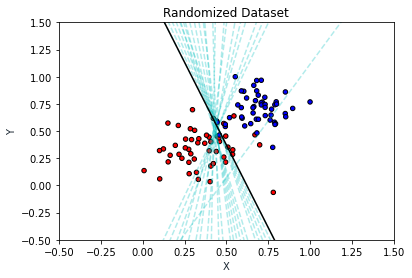

In [4]:
Weights = np.array(np.random.rand(2,1))
Bias = np.random.rand(1)[0] + x_max 
# Adding the x_max to the bias gives more accuracy, try without it, the lines will be messed up but will still work.

boundary_lines = []

print(Weights, Bias) # Comparison 1

for i in range(25):
    Output = perceptronStep(
        DataPoints, # X, Y of a point
        Data.T[2], # The True/False Data
        Weights, # Random weights
        Bias # Random bias based on x_max
    )
    Weights, Bias = Output # The updated values
    boundary_lines.append((-Weights[0]/Weights[1], -Bias/Weights[1]))

RW = Weights
Weights = list(Weights[0]) + list(Weights[1]) # Simplifying

print(Weights, Bias) # Comparison 2 

plt.scatter(
    x = Data.T[0], 
    y = Data.T[1], 
    vmin=-0.5, 
    s=20, 
    c=colors,
    edgecolors='black'
) # Scatter Plot

plt.xlim(-0.5,1.5) # Set a veiw range
plt.ylim(-0.5,1.5)

for y in boundary_lines:
    x = np.linspace(start=-10, stop=10, num=5)
    plt.plot(x, y[0] * x + y[1], linestyle="--", color="c", alpha=0.3)

Slope = -Weights[0]/Weights[1] # Calculating slope of the line
Intercept = -Bias/Weights[1] # Calculating intercept of the line

x = np.linspace(
    start=-10, # How big the line'll be.
    stop=10,
    num=5 # Amount of dots that will be connected to generate
)
y = Slope * x + Intercept # Yeah same thing for above above

plt.plot(x, y, "k") # Drawing the line

# The labels
plt.title("Randomized Dataset")
plt.xlabel('X', color='#1C2833')
plt.ylabel('Y', color='#1C2833')

plt.show()

# Blue is 0
# Red is 1

In [6]:
# Predicting

num = 50

DataPoint = DataPoints[num]
print(f"X, Y: {DataPoint}", f"Answer: {Data.T[2][num]}")

### Method 1

x1, x2 = DataPoint
w1, w2 = Weights
b = Bias

Val = w1 * x1 + w2 * x2 + b
print("Prediction:", stepFunction(Val))

### Method 2
Val = prediction(
    DataPoint, 
    RW, Bias
)
print(f"Is red?", bool(Val))

# Literally the same method

X, Y: (0.5533, 1.0) Answer: 0.0
Prediction: 0
Is red? False
